In [1]:
#KNN 3.0
import numpy as np
import pandas as pd
import librosa as lb
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
#Method

#Extract samples
def takeSamples():
    
    labels = pd.read_csv('E:\\olddesktop\courses\EEE 485 Statistical Learning and Data Analytics\Project\data\\train.csv')
    labels = labels[labels['Class'].isin(['dog_bark', 'drilling'])]
    
    samples = []

    for p in labels['ID']:
        sound = lb.load('E:\\olddesktop\\courses\\EEE 485 Statistical Learning and Data Analytics\\Project\\data\\Train\\' 
                            + str(p) + '.wav',sr=22050, mono=True)
        
        samples.append(np.mean(lb.feature.mfcc(sound[0]),axis=1))  
   
    samples = np.array(samples)
    
    xTrain, xTest, yTrain, yTest = train_test_split(samples, labels)
    
    return xTrain, xTest, yTrain['Class'].values, yTest['Class'].values

In [7]:
# Train Model and Report Result : Euclidean, Nneigbours, Uniform
def train_test_KNN( xTrain, xTest, yTrain, yTest):
    
    #for each instane in the xTest 
    yEstim = []
    
    for testSamp in xTest:
        
        a = xTrain - testSamp
        a = np.square(a)
        a = a.sum(axis=1)
        a = np.sqrt(a)
        minInds = np.argsort(a)[0:3]
        
        #determine the class 
        noDog = 0
        noDrill = 0
        for minInd in minInds:
            if(yTrain[minInd]== 'dog_bark'):
                noDog += 1
            else:
                noDrill += 1
        
        if noDog > noDrill:
            yEstim.append('dog_bark')
        else:
            yEstim.append('drilling')
        
    yEstim = np.array(yEstim)
    #compare and output confusion matrix 
    confMatrix = np.zeros((2,2))
    
    for i, est in enumerate(yEstim):
        if( est == 'dog_bark'):
            if( yTest[i] == 'dog_bark'):
                confMatrix[0,0] += 1
            else:
                confMatrix[0,1] += 1
        else:
            if( yTest[i] == 'drilling'):
                confMatrix[1,1] += 1
            else:
                confMatrix[1,0] += 1
    
            
    return confMatrix,yEstim


In [3]:
xTrain, xTest, yTrain, yTest = takeSamples() 

In [4]:
np.shape(xTest)

(300, 20)

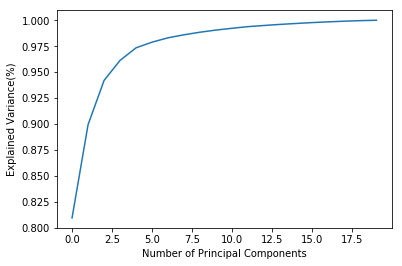

In [5]:
#A small PCA (out of curiosity)
pca = PCA().fit(xTrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance(%)')
plt.show()

In [8]:
#Malual Implementation
coMat,yestim = train_test_KNN( xTrain, xTest, yTrain, yTest)
coMat

array([[119.,   7.],
       [ 16., 158.]])

In [9]:
accuracy = (coMat[1,1] +coMat[0,0])/sum(sum(coMat))
accuracy

0.9233333333333333

In [20]:
#BONUS: some additional optimization using sklearn
param = {'n_neighbors': [3,5,7], 'weights': ['uniform','distance'], 'metric': ['euclidean', 'manhattan']}

model = GridSearchCV(KNeighborsClassifier(), param, cv=5, n_jobs=-1)
model.fit(xTrain, yTrain)
model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [23]:
print('Accuracy') 
print(model.score(xTest, yTest))
yPred = model.predict(xTest)
confusion_matrix(yPred, yTest)

Accuracy
0.95


array([[138,   3],
       [ 12, 147]], dtype=int64)